In [27]:
import speech_recognition as sr
import nltk
from nltk.corpus import cmudict
mouth_shapes = {
    'AA': 'Open mouth, tongue low',
    'AE': 'Open mouth, tongue forward low',
    'AH': 'Open mouth slightly, central tongue',
    'AO': 'Rounded lips, tongue back',
    'AW': 'Rounded lips, moving from open to closed',
    'AY': 'Mouth wide open to slight close',
    'B': 'Closed lips',
    'CH': 'Teeth close, air burst',
    'D': 'Tongue touches alveolar ridge',
    'DH': 'Teeth close, tongue between',
    'EH': 'Mouth open, tongue forward',
    'ER': 'Rounded lips, tongue curled',
    'EY': 'Mouth open, moving to close',
    'F': 'Lower lip to upper teeth',
    'G': 'Back of tongue against soft palate',
    'HH': 'Open mouth, minimal tongue movement',
    'IH': 'Slightly open mouth, tongue near front upper teeth',
    'IY': 'Mouth slightly open, tongue high and forward',
    'JH': 'Teeth close, tongue pushed against front teeth',
    'K': 'Back of tongue against soft palate',
    'L': 'Tip of tongue behind upper front teeth',
    'M': 'Closed lips, nasal',
    'N': 'Tongue touches alveolar ridge, nasal',
    'NG': 'Back of tongue against soft palate, nasal',
    'OW': 'Round lips moving from closed to slightly open',
    'OY': 'Rounded lips, moving from open to closed',
    'P': 'Closed lips, burst of air',
    'R': 'Rounded lips, tongue curled back',
    'S': 'Teeth close, tongue behind lower teeth',
    'SH': 'Teeth close, tongue curled backward',
    'T': 'Tongue touches alveolar ridge, burst of air',
    'TH': 'Tongue between teeth, air passing',
    'UH': 'Lips rounded, tongue pulled back slightly',
    'UW': 'Lips rounded, tongue high and back',
    'V': 'Upper teeth on lower lip',
    'W': 'Lips rounded, relaxed',
    'Y': 'Lips spread, tongue high',
    'Z': 'Teeth close, tongue vibrates',
    'ZH': 'Teeth close, tongue retracted slightly'
}

# Ensure you have the necessary resources
nltk.download('cmudict')
pron_dict = cmudict.dict()

# Initialize the speech recognizer and microphone
recognizer = sr.Recognizer()
mic = sr.Microphone()

def remove_numbers(string):
    numbers_to_remove = ['0', '1', '3']
    cleaned_string = ''.join(char for char in string if char not in numbers_to_remove)
    return cleaned_string

def text_to_phonetic(text):
    words = text.lower().split()
    phonetic_string =  remove_numbers(' '.join(' '.join(pron_dict[word][0]) if word in pron_dict else 'OOV' for word in words))
    print(phonetic_string)
    mouth_list = [
        ["AA", "D"], ["AE", "C"], ["AH", "C"], ["AO", "E"], ["AW", "E"],
        ["AY", "E"], ["B", "A"], ["CH", "B"], ["D", "B"], ["DH", "B"],
        ["EH", "C"], ["ER", "E"], ["EY", "E"], ["F", "G"], ["G", "B"],
        ["HH", "H"], ["IH", "C"], ["IY", "B"], ["JH", "B"], ["K", "B"],
        ["L", "H"], ["M", "A"], ["N", "B"], ["NG", "B"], ["OW", "F"],
        ["OY", "F"], ["P", "A"], ["R", "B"], ["S", "B"], ["SH", "B"],
        ["T", "B"], ["TH", "B"], ["UH", "E"], ["UW", "F"], ["V", "G"],
        ["W", "F"], ["Y", "B"], ["Z", "B"], ["ZH", "B"], ["OOV", "X"]
    ]
    mouth_movements = []
    for phoneme in phonetic_string.split():
        found = False
        for pair in mouth_list:
            if phoneme == pair[0]:
                mouth_movements.append(pair[1])
                found = True
                break
        if not found:
            mouth_movements.append("M")
    return mouth_movements



def main():
    with mic as source:
        recognizer.adjust_for_ambient_noise(source)  # Adjust for ambient noise once at the beginning
        print("Listening...")
        while True:
            try:
                audio = recognizer.listen(source, timeout=0.1, phrase_time_limit=3.0)  # Listen for 5 seconds
                text = recognizer.recognize_google(audio)
                phonetic = text_to_phonetic(text)
                print(f"------------------------------\n{text} ->\n{phonetic}\n------------------------------")
            except sr.WaitTimeoutError:
                pass
            except sr.UnknownValueError:
                print("Could not understand audio")
            except Exception as e:
                print(f"Error occurred: {str(e)}")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\zachary\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


Listening...
Could not understand audio
T EH S T IH NG T EH S T
------------------------------
testing test ->
['B', 'C', 'B', 'B', 'C', 'B', 'B', 'C', 'B', 'B']
------------------------------
Could not understand audio
Could not understand audio
OOV
------------------------------
1112 ->
['X']
------------------------------
Could not understand audio
T EH S T IH NG
------------------------------
testing ->
['B', 'C', 'B', 'B', 'C', 'B']
------------------------------
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not understand audio
Could not unde

KeyboardInterrupt: 

In [1]:
from PIL import Image, ImageTk
import tkinter as tk
import time
import speech_recognition as sr
import nltk
from nltk.corpus import cmudict

# Ensure you have the necessary resources
nltk.download("cmudict")
pron_dict = cmudict.dict()

# Initialize the speech recognizer and microphone
recognizer = sr.Recognizer()
mic = sr.Microphone()

def remove_numbers(string):
    numbers_to_remove = ["0", "1", "3"]
    cleaned_string = "".join(char for char in string if char not in numbers_to_remove)
    return cleaned_string

def text_to_phonetic(text):
    words = text.lower().split()
    phonetic_string = remove_numbers(
        " ".join(
            " ".join(pron_dict[word][0]) if word in pron_dict else "OOV"
            for word in words
        )
    )
    print(phonetic_string)
    mouth_list = [
        ["AA", "D"], ["AE", "C"], ["AH", "C"], ["AO", "E"], ["AW", "E"],
        ["AY", "E"], ["B", "A"], ["CH", "B"], ["D", "B"], ["DH", "B"],
        ["EH", "C"], ["ER", "E"], ["EY", "E"], ["F", "G"], ["G", "B"],
        ["HH", "H"], ["IH", "C"], ["IY", "B"], ["JH", "B"], ["K", "B"],
        ["L", "H"], ["M", "A"], ["N", "B"], ["NG", "B"], ["OW", "F"],
        ["OY", "F"], ["P", "A"], ["R", "B"], ["S", "B"], ["SH", "B"],
        ["T", "B"], ["TH", "B"], ["UH", "E"], ["UW", "F"], ["V", "G"],
        ["W", "F"], ["Y", "B"], ["Z", "B"], ["ZH", "B"], ["OOV", "X"],
    ]
    mouth_movements = []
    for phoneme in phonetic_string.split():
        found = False
        for pair in mouth_list:
            if phoneme == pair[0]:
                mouth_movements.append(pair[1])
                found = True
                break
        if not found:
            mouth_movements.append("M")
    return mouth_movements

# Set up the display window
root = tk.Tk()

# Define paths to your images
image_paths = {
    "A": "mouths/group2/lisa-A.png",
    "B": "mouths/group2/lisa-B.png",
    "C": "mouths/group2/lisa-C.png",
    "D": "mouths/group2/lisa-D.png",
    "E": "mouths/group2/lisa-E.png",
    "F": "mouths/group2/lisa-F.png",
    "G": "mouths/group2/lisa-G.png",
    "H": "mouths/group2/lisa-H.png",
    "X": "mouths/group2/lisa-X.png",
}

# Load images and prepare for display after root is initialized
images = {shape: Image.open(path) for shape, path in image_paths.items()}
tk_images = {shape: ImageTk.PhotoImage(image) for shape, image in images.items()}

label = tk.Label(root)
label.pack()

def display_image(shape):
    label.config(image=tk_images[shape])
    root.update()
    time.sleep(0.2)  # Display each shape for half a second

def add_transition_shapes(phonetic):
    # Define special transitions
    transitions = {
        ("A", "D"): ["A", "C", "D"],
        ("B", "D"): ["B", "C", "D"],
        ("C", "F"): ["C", "E", "F"],
        ("D", "F"): ["D", "E", "F"],
    }
    result = []
    i = 0
    while i < len(phonetic) - 1:
        current_shape = phonetic[i]
        next_shape = phonetic[i + 1]
        if (current_shape, next_shape) in transitions:
            result.extend(transitions[(current_shape, next_shape)])
            i += 1  # Skip the next shape because it's already included in the transition
        else:
            result.append(current_shape)
        i += 1
    if i == len(phonetic) - 1:
        result.append(phonetic[-1])
    return result

def main():
    with mic as source:
        recognizer.adjust_for_ambient_noise(source)
        print("Listening...")
        while True:
            try:
                audio = recognizer.listen(source, timeout=0.1, phrase_time_limit=3.0)
                text = recognizer.recognize_google(audio)
                phonetic = text_to_phonetic(text)
                print(f"------------------------------\n{text} ->\n{phonetic}\n------------------------------")
                enhanced_phonetic = add_transition_shapes(phonetic)
                for shape in enhanced_phonetic:
                    display_image(shape)
            except sr.WaitTimeoutError:
                pass
            except sr.UnknownValueError:
                print("Could not understand audio")
            except Exception as e:
                print(f"Error occurred: {str(e)}")

if __name__ == "__main__":
    main()


[nltk_data] Downloading package cmudict to
[nltk_data]     C:\Users\zachary\AppData\Roaming\nltk_data...
[nltk_data]   Package cmudict is already up-to-date!


Listening...
Could not understand audio
T EH S T IH NG
------------------------------
testing ->
['B', 'C', 'B', 'B', 'C', 'B']
------------------------------
Could not understand audio
Could not understand audio
M IH K T EH S T W AH N T UW M AY T T EH S T W AH N T UW
------------------------------
mic test one two might test one two ->
['A', 'C', 'B', 'B', 'C', 'B', 'B', 'F', 'C', 'B', 'B', 'F', 'A', 'E', 'B', 'B', 'C', 'B', 'B', 'F', 'C', 'B', 'B', 'F']
------------------------------
Could not understand audio
Could not understand audio
S L AY T L IY F AE S T ER
------------------------------
slightly faster ->
['B', 'H', 'E', 'B', 'H', 'B', 'G', 'C', 'B', 'B', 'E']
------------------------------
Could not understand audio
Could not understand audio
Could not understand audio


KeyboardInterrupt: 

: 

https://github.com/DanielSWolf/rhubarb-lip-sync?tab=readme-ov-file

In [18]:
from IPython.display import display, HTML
import os
def display_images_in_grid(directory, images_per_row=4):
    # List all files in the directory
    files = os.listdir(directory)
    
    # Filter out only image files
    image_files = [file for file in files if file.endswith((".png", ".jpg", ".jpeg", ".gif"))]
    
    # Generate HTML for displaying images in a grid
    html_output = "<div style='display:flex; flex-wrap:wrap;'>"
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(directory, image_file)
        html_output += "<div style='flex: 25%; padding: 5px; text-align: center;'>"
        html_output += f"<img src='{image_path}' style='width:100%'><br>"
        html_output += f"<small>{image_file}</small>"
        html_output += "</div>"
        if (i + 1) % images_per_row == 0:
            html_output += "<br>"
    html_output += "</div>"
    
    # Display HTML content
    display(HTML(html_output))

# Specify the directory containing the images
image_directory = "mouths"

# Call the function to display images in a grid
display_images_in_grid(image_directory, images_per_row=5)


In [8]:
import re
import svgwrite
from svgwrite import cm, mm
import xml.etree.ElementTree as ET

def extract_path_data(svg_file):
    """ Extract path data from an SVG file """
    tree = ET.parse(svg_file)
    root = tree.getroot()
    path_data = {}
    for path in root.findall('.//{http://www.w3.org/2000/svg}path'):
        path_data[path.get('id')] = path.get('d')
    return path_data

def parse_svg_path(path):
    """ Parse the SVG path into a list of commands and their parameters. """
    path_re = re.compile(r'([MmLlHhVvCcSsQqTtAaZz])\s*([^\sMmLlHhVvCcSsQqTtAaZz]*)')
    segments = []
    for command, params in path_re.findall(path):
        params = [float(x) for x in re.findall(r'-?\d+\.?\d*', params)]
        segments.append((command, params))
    return segments

def normalize_commands(segments):
    """ Convert line commands into equivalent cubic bezier commands for consistency. """
    normalized = []
    last_x, last_y = 0, 0  # Keep track of the last x, y coordinates for relative calculations

    for command, params in segments:
        if 'M' == command.upper():  # Move command resets the last known position
            last_x, last_y = params[-2:]
            normalized.append((command, params))
        elif 'L' == command.upper():  # Convert line to cubic bezier
            if command.islower():  # Relative line command
                x, y = params
                params = [0, 0, x/2, y/2, x, y]
            else:  # Absolute line command
                x, y = params
                params = [last_x, last_y, (last_x + x)/2, (last_y + y)/2, x, y]
                last_x, last_y = x, y
            new_command = 'c' if command == 'l' else 'C'
            normalized.append((new_command, params))
        elif 'C' == command.upper():  # Cubic Bezier command
            last_x, last_y = params[-2:]  # Update last known position
            normalized.append((command, params))
        elif command.upper() in ['H', 'V', 'S', 'Q', 'T', 'A', 'Z']:  # Currently unsupported commands
            # This needs to be handled based on specific needs or extended
            print(f"Warning: Command '{command}' not supported for normalization")
        else:
            raise ValueError(f"Unsupported command found: {command}")

    return normalized

def interpolate_path(path1, path2, fraction):
    """ Interpolate between two paths at a given fraction between 0 and 1. """
    segments1 = normalize_commands(parse_svg_path(path1))
    segments2 = normalize_commands(parse_svg_path(path2))
    result = []
    for (command1, params1), (command2, params2) in zip(segments1, segments2):
        if command1 != command2:
            raise ValueError("Cannot interpolate between different commands after normalization")
        interpolated_params = [(1 - fraction) * p1 + fraction * p2 for p1, p2 in zip(params1, params2)]
        result.append((command1, interpolated_params))
    interpolated_path = ""
    for command, params in result:
        interpolated_path += command + ' ' + ' '.join(f'{x:.3f}' for x in params) + ' '
    return interpolated_path.strip()

def generate_interpolated_svg(paths1, paths2, steps, output_template):
    """ Generate interpolated SVGs between path data dictionaries. """
    for i in range(steps + 1):
        fraction = i / steps
        dwg = svgwrite.Drawing(output_template.format(i), profile='tiny', size=(1920*mm, 1080*mm))
        for path_id in paths1.keys():
            if path_id in paths2:
                interpolated_path = interpolate_path(paths1[path_id], paths2[path_id], fraction)
                dwg.add(dwg.path(d=interpolated_path, fill='none', stroke='black', stroke_width=0.1*mm))
            else:
                print(f"Warning: No matching path for '{path_id}' in one of the SVGs.")
        dwg.save()

# Example use (adjust the path to your SVG files)
svg_file1 = 'first_svg.svg'
svg_file2 = 'second_svg.svg'
path_data_1 = extract_path_data(svg_file1)
path_data_2 = extract_path_data(svg_file2)
generate_interpolated_svg(path_data_1, path_data_2, 10, 'interpolated_{}.svg')


ValueError: too many values to unpack (expected 2)

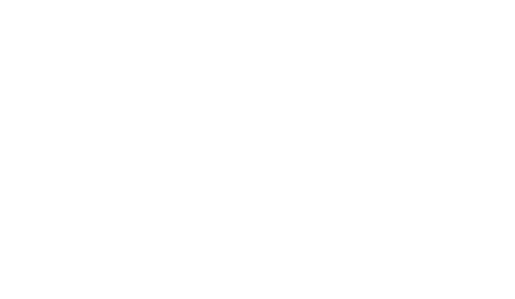

In [14]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

# Parse an SVG file and return a dictionary of path data for specified IDs
def parse_svg(file_path, ids):
    tree = ET.parse(file_path)
    root = tree.getroot()
    path_data = {}
    for path in root.findall('.//{http://www.w3.org/2000/svg}path'):
        if path.get('id') in ids:
            path_data[path.get('id')] = path.get('d')
    return path_data

# Function to interpolate between two path data strings (this is a placeholder)
def interpolate_path(d1, d2, fraction):
    # Placeholder: real interpolation logic needed
    return d1 if fraction < 0.5 else d2

# Define path IDs to animate
path_ids = ['Inner_Mouth', 'Tongue', 'Lower_Teeth', 'Upper_teeth', 'Upper_Lips', 'Lower_Lips']

# Load SVG data
svg1_paths = parse_svg('first_svg.svg', path_ids)
svg2_paths = parse_svg('second_svg.svg', path_ids)

fig, ax = plt.subplots()
ax.set_xlim([0, 1920])
ax.set_ylim([1080, 0])  # SVGs often have the y-axis inverted
ax.set_aspect('equal')
ax.axis('off')

# Create a dictionary to store the patches for each path
path_patches = {id: plt.Polygon([[0, 0]], closed=True, fc='none') for id in path_ids}
for patch in path_patches.values():
    ax.add_patch(patch)

def update(frame):
    fraction = frame / 50  # Animation steps
    for id in path_ids:
        d1 = np.array([0, 0])  # Replace these placeholders with parsed path data
        d2 = np.array([1920, 1080])  # Replace these placeholders with parsed path data
        new_d = interpolate_path(d1, d2, fraction)  # Simplified
        path_patches[id].set_xy(new_d.reshape((-1, 2)))
    return path_patches.values()

ani = animation.FuncAnimation(fig, update, frames=50, interval=50, blit=True)
plt.show()
